In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#读取计算机中的图像
img = cv2.imread('/content/drive/MyDrive/Coding/JupyterNotebook/深度学习_冲刺班/Lesson 16/图像/blue-peacock.jpg') #不要有中文，不要有空格

In [ ]:
img

In [ ]:
img = cv2.cvtColor(img
                   ,cv2.COLOR_BGR2RGB #转换方式
                   ) 

In [ ]:
#OpenCV在读取图像时会默认图像通道的顺序是BGR

In [ ]:
img.shape

(1707, 2560, 3)

In [ ]:
#展示图片
plt.figure(dpi=300) #画布，dpi是分辨率
plt.imshow(img)
plt.axis('off'); #不显示坐标轴

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
a = np.array([0,1,255],dtype="uint8")

In [ ]:
a

array([  0,   1, 255], dtype=uint8)

In [ ]:
a + 10

array([10, 11,  9], dtype=uint8)

In [ ]:
a - 10

array([246, 247, 245], dtype=uint8)

In [ ]:
img = img*1.0 #先将向量转换为浮点数再进行操作

In [ ]:
img 

In [ ]:
b = np.array([280,-3,250])

In [ ]:
np.clip(b,0,255) #用来将数字限制在某个范围内的函数

array([255,   0, 250])

In [ ]:
img = img/255 #归一化

In [ ]:
img

array([[[0.11764706, 0.10588235, 0.07843137],
        [0.1254902 , 0.11372549, 0.08627451],
        [0.13333333, 0.12156863, 0.09411765],
        ...,
        [0.32941176, 0.6       , 0.42745098],
        [0.3254902 , 0.59607843, 0.42352941],
        [0.30980392, 0.58039216, 0.40784314]],

       [[0.12941176, 0.11764706, 0.09019608],
        [0.14117647, 0.12941176, 0.10196078],
        [0.14901961, 0.1372549 , 0.10980392],
        ...,
        [0.3254902 , 0.59607843, 0.42352941],
        [0.3254902 , 0.59607843, 0.42352941],
        [0.31372549, 0.58431373, 0.41176471]],

       [[0.11764706, 0.10588235, 0.07843137],
        [0.13333333, 0.12156863, 0.09411765],
        [0.14117647, 0.12941176, 0.10196078],
        ...,
        [0.32156863, 0.59215686, 0.41960784],
        [0.32156863, 0.59215686, 0.41960784],
        [0.30980392, 0.58039216, 0.40784314]],

       ...,

       [[0.41568627, 0.40784314, 0.34901961],
        [0.44313725, 0.43529412, 0.38431373],
        [0.34509804, 0

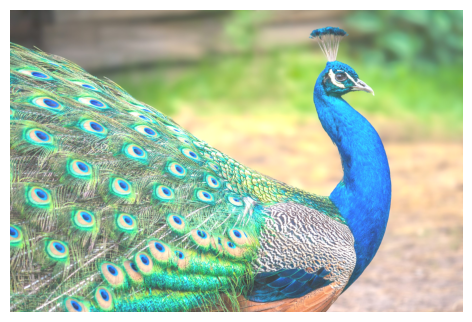

In [ ]:
#调亮画面
img_ = np.clip(img + 50/255,0,1) #np.clip是一个抹掉范围外值的函数
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off');

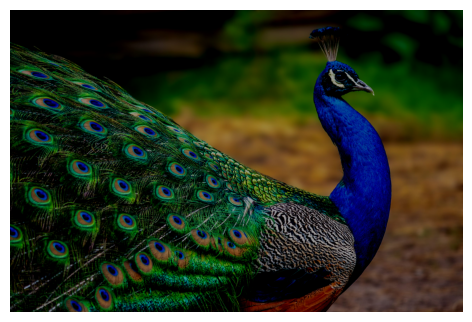

In [ ]:
#调暗画面
img_ = np.clip(img - 100/255,0,1)
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off');

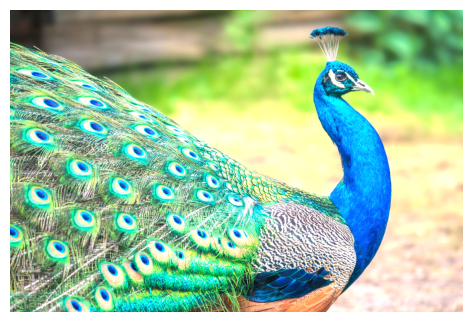

In [ ]:
#让画面更鲜艳
img_ = np.clip(img*1.5,0,1)
#原本就很大的值会增长得更快，因此原本就很鲜艳的颜色会变得更加鲜艳，增加对比度
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off');

In [ ]:
img = cv2.imread('D:/cv/peacock/blue-peacock.jpg')

In [ ]:
#OpenCV默认读取后的图像通道是BGR，为了调整饱和度，我们直接将通道转换为HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
h, s, v = cv2.split(img_hsv)

In [ ]:
#这里分解出的是uint8，要在uint8上进行数值操作则必须先更换为浮点数

#h += np.clip(s*1.0+100,0,255).astype("uint8") # 色相
s += np.clip(s*1.0+100,0,255).astype("uint8") # 饱和度
#v += np.clip(s*1.0+100,0,255).astype("uint8") # 亮度
final_hsv = cv2.merge((h, s, v))

In [ ]:
#为了绘图，这里是转回RGB，而不是BGR
img_s = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

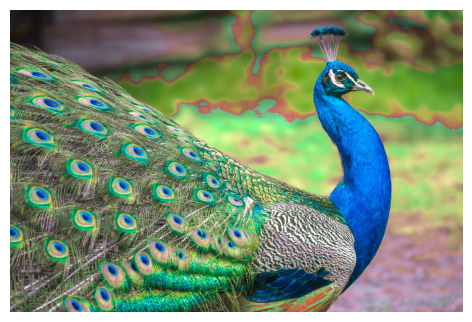

In [ ]:
plt.figure(dpi=100)
plt.imshow(img_s)
plt.axis('off');

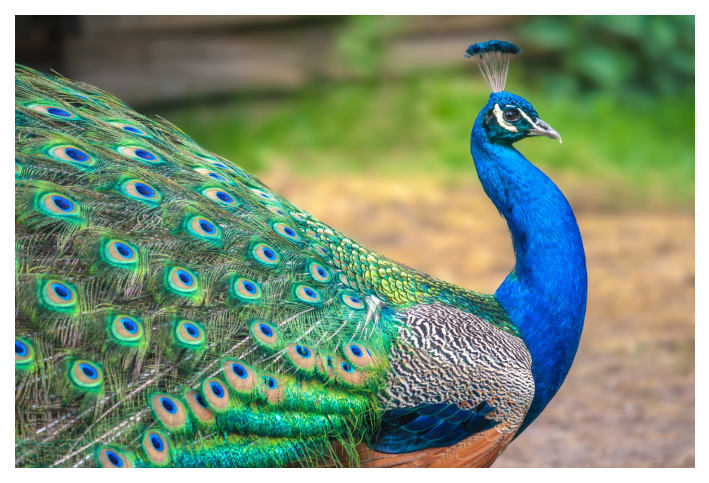

In [ ]:
plt.figure(dpi=150) #画布，dpi是分辨率
plt.imshow(img)
plt.axis('off'); #不显示坐标轴

In [ ]:
pic = np.random.randint(0,255,size=(300,300,3))

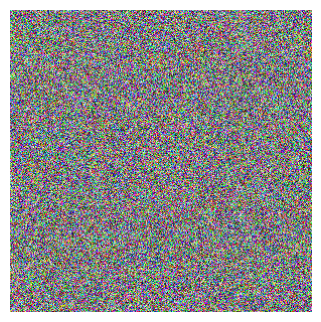

In [ ]:
plt.figure(dpi=100)
plt.imshow(pic)
plt.axis('off');

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('D:\cv\edge detection.png')

In [ ]:
#索贝尔等经典卷积操作在灰度图像上表现更好，因此我们将图像导入时就转化为灰度图像
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

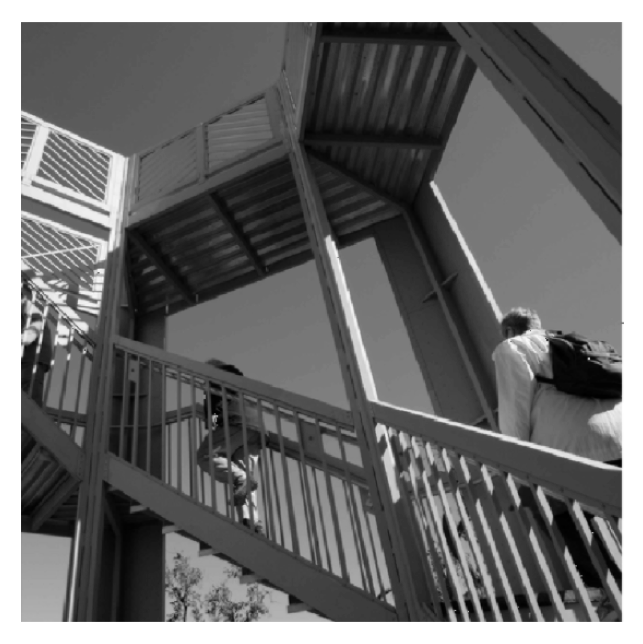

In [ ]:
#查看原图
plt.figure(dpi=200)
plt.imshow(img
           ,cmap="gray" #colormap
          ) 
plt.axis('off'); 

In [ ]:
#两种经典算子：拉普拉斯与索贝尔
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=5)
#cv2.CV_64F是opencv中常常使用的一种数据格式
#在这里输入之后可以保证输出数据是uint8类型
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) #横向的索贝尔，旋转矩阵为5X5
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) #纵向的索贝尔，旋转矩阵为5X5

(Text(0.5, 1.0, 'Sobel Y'), (-0.5, 552.5, 552.5, -0.5))

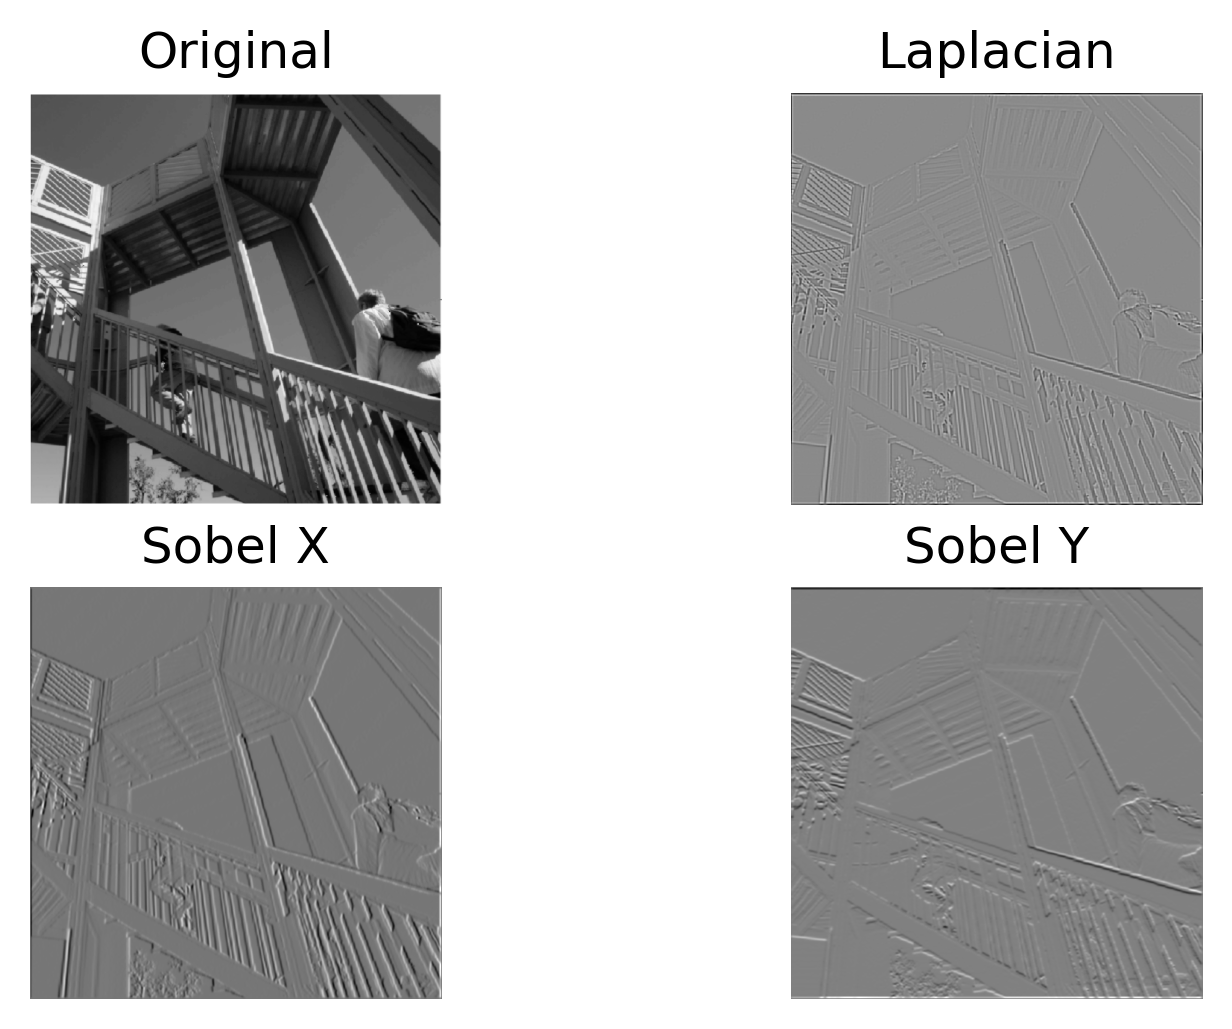

In [ ]:
plt.figure(dpi=300)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'),plt.axis('off')

In [ ]:
img = cv2.imread('D:/cv/peacock/blue-peacock.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=5)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

(Text(0.5, 1.0, 'Sobel Y'), (-0.5, 2559.5, 1706.5, -0.5))

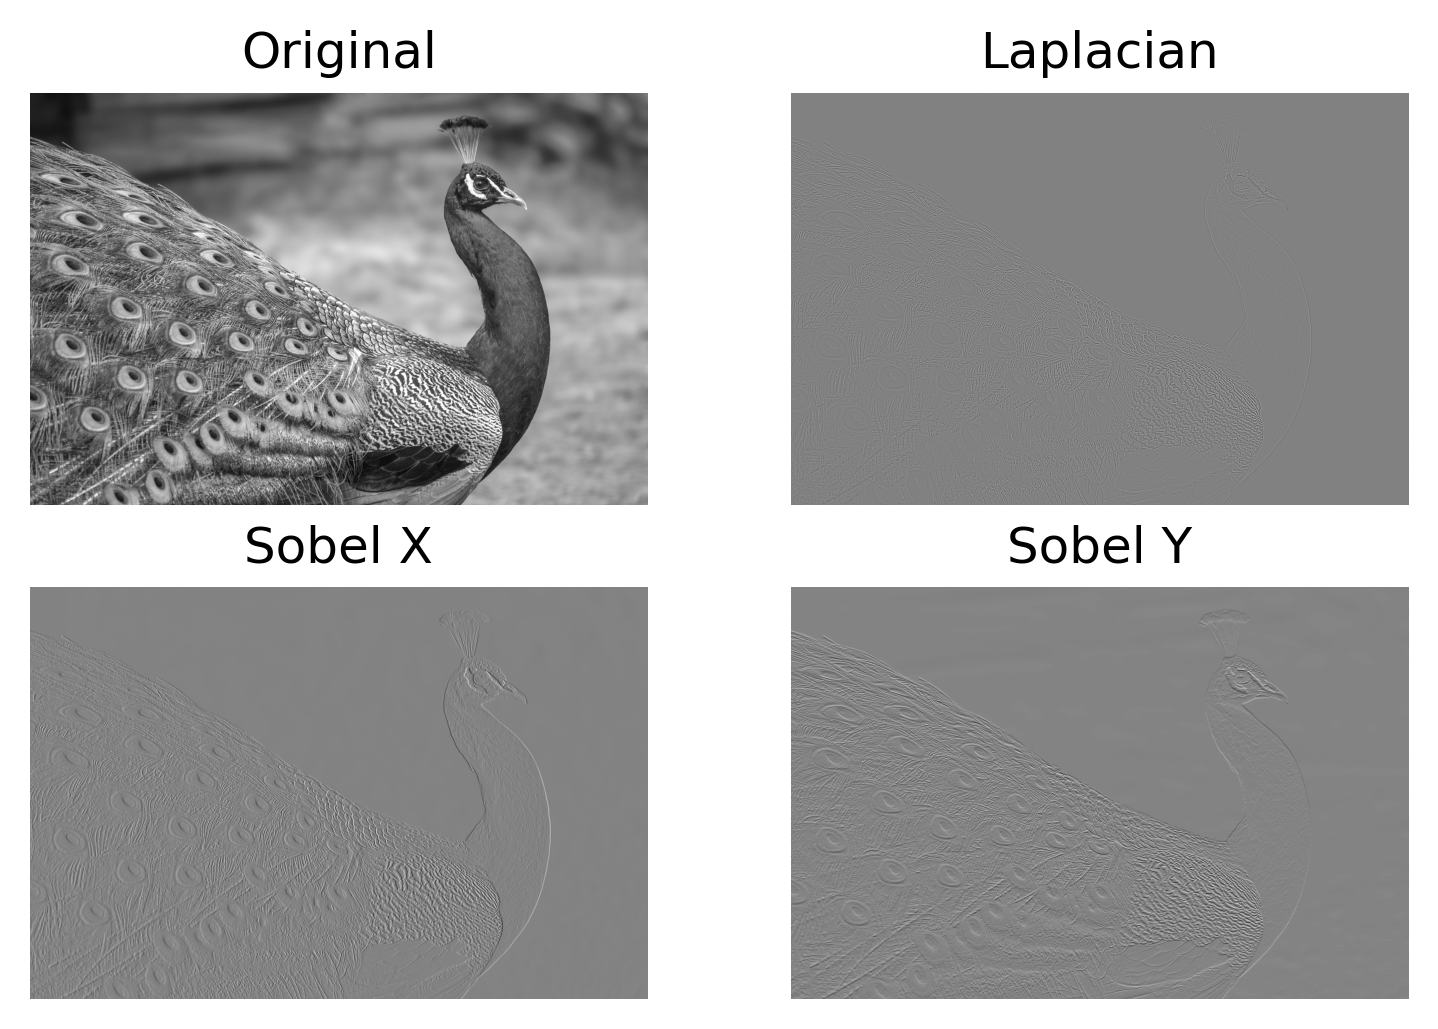

In [ ]:
plt.figure(dpi=300)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'),plt.axis('off')

In [ ]:
import torch
from torch import nn

In [ ]:
#假设一组数据
data = torch.ones(size=(10,3,28,28)) #(samples,c,w,h)

In [ ]:
conv1 = nn.Conv2d(in_channels = 3 #输入图像的通道数/上一层传入的特征图的数目
                  ,out_channels = 6 #所有RGB通道会被合并，被扫描6次
                  ,kernel_size = 3 #卷积核尺寸是3x3
                 )

In [ ]:
conv2 = nn.Conv2d(in_channels = 6
                  ,out_channels = 4
                  ,kernel_size = 3)

In [ ]:
#nn.Conv2d(6,4,3) #in_channels, out_channels, kernel_size

In [ ]:
conv1(data).shape #26*26

torch.Size([10, 6, 26, 26])

In [ ]:
conv2(conv1(data)).shape

torch.Size([10, 4, 24, 24])

通道之间的input和output需要一一对应不然花式报错

In [ ]:
conv3 = nn.Conv2d(in_channels = 3 #输入图像的通道数/上一层传入的特征图的数目
                  ,out_channels = 6 #所有RGB通道会被合并，被扫描6次
                  ,kernel_size = 3 #卷积核尺寸是3x3
                 )
conv4 = nn.Conv2d(in_channels = 10
                  ,out_channels = 4
                  ,kernel_size = 3)

In [ ]:
conv4(conv3(data))

RuntimeError: ignored

In [ ]:
#计算公式
#(W + 2p - K)/S + 1
#(H + 2p - K)/S + 1
#当我们不调整conv2d中的参数时，p默认为0，S默认为1

In [ ]:
data = torch.ones(size=(10,3,28,28))

In [ ]:
conv1 = nn.Conv2d(3,6,3) #in_channels, out_channles, kernel_size
conv2 = nn.Conv2d(6,10,3)
conv3 = nn.Conv2d(10,16,5,stride=2,padding=1)
conv4_ = nn.Conv2d(16,3,5,stride=(2,3),padding=2)
#stride = 3, padding =1

In [ ]:
#conv1 (28+0-3)/1 + 1 = 26  (10, 6, 26, 26)
conv1(data).shape

torch.Size([10, 6, 26, 26])

In [ ]:
#conv2 (26 +0 -3)/1 +1 = 24 (10,10,24,24)

In [ ]:
conv2(conv1(data)).shape

torch.Size([10, 10, 24, 24])

In [ ]:
#conv3 (24 +2*1 - 5)/2 + 1 = 11.5 #小数，图像没有办法被扫描完全
#floor - 向下取整
#feature map - (10,16, 11,11)

In [ ]:
conv3(conv2(conv1(data))).shape

torch.Size([10, 16, 11, 11])

In [ ]:
#conv4 = nn.Conv2d(16,3,5,stride=3,padding=2)
#conv4 (11 + 2*2 -5)/3 + 1 = 4.33333
#(10,3,4,4)

In [ ]:
conv4(conv3(conv2(conv1(data)))).shape

torch.Size([10, 3, 4, 4])

In [ ]:
#conv4_ = nn.Conv2d(16,3,5,stride=(2,3),padding=2)
#conv4_ weight: (11 + 4 - 5)/2 +1 = 6
#       height: (11 + 4 - 5)/3 +1 = 4.3333
# (10,3,6,4)

In [ ]:
conv4_(conv3(conv2(conv1(data)))).shape

torch.Size([10, 3, 6, 4])

In [ ]:
data = torch.ones(size=(10,3,28,28))

In [ ]:
conv1 = nn.Conv2d(3,6,3) #(28 + 0 -3)/1 + 1 = 26
conv3 = nn.Conv2d(6,16,5, stride = 2, padding = 1)
#(26 + 2 - 5)/2 + 1 = 12

In [ ]:
pool1 = nn.MaxPool2d(2) #kernel_size=2, 2x2, 默认步长stride = (2,2)

In [ ]:
#(12 + 0 -2)/2 + 1 = 6

In [ ]:
pool1(conv3(conv1(data))).shape 

torch.Size([10, 16, 6, 6])

In [ ]:
#(2,2)

In [ ]:
#当使用池化层的时候，我们最关心的就是输出的特征图的尺寸是多少

In [ ]:
pool2 = nn.AdaptiveMaxPool2d(output_size = (3,7))

In [ ]:
pool2(conv3(conv1(data))).shape

torch.Size([10, 16, 3, 7])

In [ ]:
data = torch.ones(size=(10,3,28,28))

In [ ]:
conv1 = nn.Conv2d(3,32,5,padding = 2) #(28 + 4 -5)/1 +1 = 28

In [ ]:
bn1 = nn.BatchNorm2d(32)

In [ ]:
bn1(conv1(data)).shape

RuntimeError: running_mean should contain 32 elements not 10

In [ ]:
bn1 = nn.BatchNorm2d(10)

In [ ]:
data = torch.ones(size=(10,1,28,28))

In [ ]:
conv1 = nn.Conv2d(1,32,5,padding=2)
dp1 = nn.Dropout2d(0.5)

In [ ]:
dp1(conv1(data)).shape #不会改变feature map的形状

torch.Size([10, 32, 28, 28])

### LeNet5

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
data = torch.ones(size=(10,1,32,32))

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021PyTorchDL/WEEK9/55.jpg?versionId=CAEQFRiBgIC.tMfsxBciIGFhZTkwYjRmZDNkMDRhZWM5M2VlYzBhMDk0Y2U0ZWNi)

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5) #(H+2p-K)/S + 1
        self.pool1 = nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.pool2 = nn.AvgPool2d(2)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
    
    def forward(self,x):
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,5*5*16) #-1，我不关心-1这个位置上的数是多少，你根据我输入的x的结构帮我自己计算吧
        x = F.tanh(self.fc1(x))
        output = F.softmax(self.fc2(x),dim=1) #(samples, features)

In [4]:
net = Model() #实例化

In [5]:
net(data)  #相当于在执行 net.forward(data) 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [ ]:
#torchinfo

In [ ]:
#cmd/terminal
#pip install torchinfo

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
net = Model()

In [ ]:
summary(net, input_size=(10,1,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [10, 6, 28, 28]           156
├─AvgPool2d: 1-2                         [10, 6, 14, 14]           --
├─Conv2d: 1-3                            [10, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [10, 16, 5, 5]            --
├─Linear: 1-5                            [10, 120]                 48,120
├─Linear: 1-6                            [10, 84]                  10,164
Total params: 60,856
Trainable params: 60,856
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.04
Forward/backward pass size (MB): 0.52
Params size (MB): 0.24
Estimated Total Size (MB): 0.81

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021PyTorchDL/WEEK9/55.jpg?versionId=CAEQFRiBgIC.tMfsxBciIGFhZTkwYjRmZDNkMDRhZWM5M2VlYzBhMDk0Y2U0ZWNi)

### AlexNet

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
data = torch.ones(size=(10,3,227,227)) #224 x 224

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021PyTorchDL/WEEK9/56.AlexNet-1.png?versionId=CAEQFRiBgMCCtvntxBciIGUwNjJmNGY5NmVkMTQwMzRhNjBhYTI0MmM3NWY1YTlh)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        #为了处理尺寸较大的原始图片，先使用11x11的卷积核和较大的步长来快速降低特征图的尺寸
        #同时，使用比较多的通道数，来弥补降低尺寸造成的数据损失
        self.conv1 = nn.Conv2d(3,96, kernel_size=11, stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2) #overlap pooling
        
        #已经将特征图尺寸缩小到27x27，计算量可控，可以开始进行特征提取了
        #卷积核、步长恢复到业界常用的大小，进一步扩大通道来提取数据
        self.conv2 = nn.Conv2d(96,256,kernel_size=5,padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        #疯狂提取特征，连续用多个卷积层
        #kernel 5, padding 2, kernel 3, padding 1 可以维持住特征图的大小
        self.conv3 = nn.Conv2d(256,384,kernel_size=3, padding =1) 
        self.conv4 = nn.Conv2d(384,384,kernel_size=3, padding =1)
        self.conv5 = nn.Conv2d(384,256,kernel_size=3, padding =1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        #进入全连接层，进行信息汇总
        self.fc1 = nn.Linear(6*6*256,4096) #上层所有特征图上的所有像素
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,1000)
    
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)

        x = x.view(-1,6*6*256) #将数据拉平

        x = F.dropout(x,p=0.5)
        x = F.relu(F.dropout(self.fc1(x),p=0.5))
        x = F.relu(self.fc2(x))
        output = F.softmax(self.fc3(x),dim=1)

In [ ]:
net = Model()

In [ ]:
net(data)

In [ ]:
from torchinfo import summary

In [ ]:
summary(net,input_size=(10,3,227,227))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [10, 96, 55, 55]          34,944
├─MaxPool2d: 1-2                         [10, 96, 27, 27]          --
├─Conv2d: 1-3                            [10, 256, 27, 27]         614,656
├─MaxPool2d: 1-4                         [10, 256, 13, 13]         --
├─Conv2d: 1-5                            [10, 384, 13, 13]         885,120
├─Conv2d: 1-6                            [10, 384, 13, 13]         1,327,488
├─Conv2d: 1-7                            [10, 256, 13, 13]         884,992
├─MaxPool2d: 1-8                         [10, 256, 6, 6]           --
├─Linear: 1-9                            [10, 4096]                37,752,832
├─Linear: 1-10                           [10, 4096]                16,781,312
├─Linear: 1-11                           [10, 1000]                4,097,000
Total params: 62,378,344
Trainable params: 62,378,344
Non-trainable params: 0
Total mult-adds (G): 1.14
In